Using RSI indicators to backtest select stocks

Using American Tower corporation (AMT)

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import backtrader as bt
import matplotlib.pyplot as plt

In [4]:
ticker = ["AMT"]

df = yf.download(ticker)

print(df)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open   Volume
Ticker             AMT         AMT         AMT         AMT      AMT
Date                                                               
1998-02-27   13.150080   13.623104   13.150080   13.150080    50000
1998-03-02   13.055471   13.055471   12.866262   13.055471    75000
1998-03-03   12.960867   12.960867   12.677052   12.960867    35000
1998-03-04   11.920215   11.920215   11.731005   11.920215    60000
1998-03-05   12.204033   12.204033   12.204033   12.204033      400
...                ...         ...         ...         ...      ...
2025-03-17  212.690002  216.330002  211.350006  212.199997  3097600
2025-03-18  214.869995  216.289993  211.369995  212.690002  3996500
2025-03-19  213.759995  215.619995  211.639999  214.259995  2244200
2025-03-20  214.270004  215.130005  212.660004  214.899994  1839300
2025-03-21  216.229996  219.589996  212.669998  213.860001  4030600

[6809 rows x 5 columns]


Plot moving averages

[*********************100%***********************]  1 of 1 completed


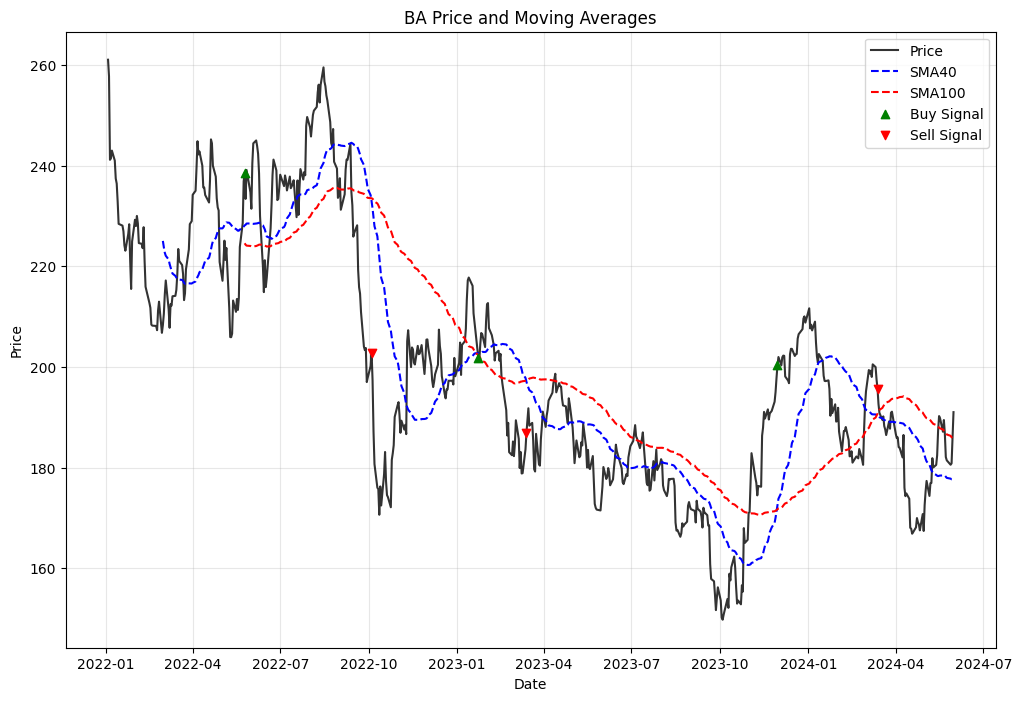

In [8]:
# Parameters for the strategy
short_window = 40  # Short-term moving average
long_window = 100  # Long-term moving average
stock_symbol = 'BA'  # Stock ticker (Apple in this case)
start_date = '2022-01-01'  # Start date for backtesting
end_date = '2024-06-01'  # End date for backtesting

# Fetch stock data using yfinance
df = yf.download(ticker, start=start_date, end=end_date)

# Compute short-term and long-term moving averages using Pandas
df['SMA40'] = df['Close'].rolling(window=short_window).mean()
df['SMA100'] = df['Close'].rolling(window=long_window).mean()

# Generate Buy/Sell signals
df['Signal'] = 0  # Default to no position
df.loc[df.index[short_window]:, 'Signal'] = np.where(df['SMA40'][short_window:] > df['SMA100'][short_window:], 1, 0)
df['Position'] = df['Signal'].diff()  # Capture changes in signal

# Plot stock price and moving averages
plt.figure(figsize=(12, 8))
plt.plot(df['Close'], label='Price', color='k', alpha=0.8)
plt.plot(df['SMA40'], label=f'SMA{short_window}', color='b', linestyle='--')
plt.plot(df['SMA100'], label=f'SMA{long_window}', color='r', linestyle='--')
plt.scatter(df.index[df['Position'] == 1], df['Close'][df['Position'] == 1], 
            marker='^', color='g', label='Buy Signal', zorder=5)
plt.scatter(df.index[df['Position'] == -1], df['Close'][df['Position'] == -1], 
            marker='v', color='r', label='Sell Signal', zorder=5)
plt.title(f'{stock_symbol} Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [40]:
# follow 70-30 RSI rule

class RSIBacktest:
    def _init_(self):
            self.symbol = "AMT"
            self.start = "2020-01-01"
            self.end = "2024-01-01"
            self.initial_capital = 10000
            self.lower_threshold = 30
            self.upper_threshold = 70
            self.rsi_window = 14
            self.trades = []
            self.data = self.get_data()

    def get_data(self):
        df = yf.download(self.symbol, start = self.start, end= self.end)
        df["RSI"] = self.compute_rsi(df["Adj_Close"])
        return df
    
    def compute_rsi(self,series):
        delta = series.diff()
        gain = (delta.where(delta > 0, 0)).rolling(self.rsi_window).mean() #assigning binary position
        loss = (-delta.where(delta < 0, 0)).rolling(self.rsi_window).mean()
        rs = gain / loss
        return 100 - (100 / (1 + rs))
    
    def generate_signals(self):
        """Generate buy/sell signals based on RSI levels."""
        self.data["Signal"] = np.where(
            self.data["RSI"] < self.lower_threshold, 1,  # Buy signal
            np.where(self.data["RSI"] > self.upper_threshold, -1, 0)  # Sell signal
        )


In [ ]:
def backtest(self):
    self.generate_signals()
    cash = self.initial_capital
    position = 0
    portfolio_value = []

    for i in range(len(self.data)):
        price = self> df["Adj_Close"].iloc[i]
        signal = self.data["signal"].iloc[i]

        if signal == 1 and cash > 0:
            position = cash/price
            cash = 0
            self.trades_append((self.data.index[i], "BUY", price))
        elif signal == -1 and position > 0:
            cash_sell = position*price
            position = 0
            self.trades.append((self.data.index[i], "SELL", price))

        portfolio_value.append(cash + cash_sell)

    self.data["Portfolio"] = portfolio_value

In [42]:
def plot_results(self):
        """Plot stock price and portfolio performance."""
        plt.figure(figsize=(12, 6))
        plt.plot(self.data.index, self.data["Portfolio"], label="Portfolio Value", color="green")
        plt.plot(self.data.index, self.data["Adj Close"] * (self.initial_capital / self.data["Adj Close"].iloc[0]), label="Stock Price (Normalized)", color="blue")
        plt.legend()
        plt.title(f"RSI Backtest Results for {self.symbol}")
        plt.show()

In [43]:
def print_performance(self):
        """Display final portfolio value and Sharpe ratio."""
        final_value = self.data["Portfolio"].iloc[-1]
        returns = self.data["Portfolio"].pct_change().dropna()
        sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)

        print(f"Final Portfolio Value: ${final_value:.2f}")
        print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

def get_trade_log(self):
        """Return trade history."""
        return pd.DataFrame(self.trades, columns=["Date", "Action", "Price"])

In [45]:
backtest = RSIBacktest()
#backtest.backtest()
backtest.plot_results()
backtest.print_performance()
trade_log = backtest.get_trade_log()
print(trade_log)

AttributeError: 'RSIBacktest' object has no attribute 'plot_results'

In [64]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

class RSIBacktest:
    def __init__(self):
        self.symbol = "AMT"
        self.start = "2020-01-01"
        self.end = "2024-01-01"
        self.initial_capital = 10000
        self.lower_threshold = 30
        self.upper_threshold = 70
        self.rsi_window = 14
        self.trades = []
        self.data = self.get_data()

    def get_data(self):
        df = yf.download(self.symbol, start=self.start, end=self.end)
        delta = df['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(self.rsi_window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(self.rsi_window).mean()
        rs = gain / loss
        df['RSI'] = 100 - (100 / (1 + rs))
        return df

    def backtest(self):
        df = self.data
        df["Signal"] = np.where(df["RSI"] < self.lower_threshold, 1,
                          np.where(df["RSI"] > self.upper_threshold, -1, 0))
        
        cash = self.initial_capital
        position = 0
        Portfolio = []

        for i in range(len(df)):
            price = df["Close"].iloc[i]
            signal = df["Signal"].iloc[i]  

        if signal == 1 and cash > 0:
            position = cash / price
            cash = 0
            self.trades.append((df.index[i], "BUY", price))

        elif signal == -1 and position > 0:
            cash = position * price
            position = 0
            self.trades.append((df.index[i], "SELL", price))

        Portfolio.append(cash + position * price)
    def plot_results(self):
        plt.figure(figsize=(12, 6))
        plt.plot(self.data.index, self.data["Portfolio"], label="Portfolio", color="green")
        plt.plot(self.data.index, self.data["Close"] * (self.initial_capital / self.data["Close"].iloc[0]),
                 label="Stock (normalized)", color="blue")
        plt.legend()
        plt.title(f"RSI Backtest for {self.symbol}")
        plt.show()

    def print_performance(self):
        final_value = self.data["Portfolio"].iloc[-1]
        returns = self.data["Portfolio"].pct_change().dropna()
        sharpe = returns.mean() / returns.std() * np.sqrt(252)
        print(f"Final Value: ${final_value:.2f}")
        print(f"Sharpe Ratio: {sharpe:.2f}")

    def get_trade_log(self):
        return pd.DataFrame(self.trades, columns=["Date", "Action", "Price"])


In [65]:
backtest = RSIBacktest()
backtest.backtest()
backtest.plot_results()
backtest.print_performance()
print(backtest.get_trade_log())

[*********************100%***********************]  1 of 1 completed


KeyError: 'Portfolio'

<Figure size 1200x600 with 0 Axes>